In [190]:
import joblib as jl
import json
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [193]:
ps = glob.glob('../nonlinear_logs/*')
ps.sort()
p=ps[-1]
print(p)
loss=jl.load(os.path.join(p, 'loss_history.jl'))
aux=jl.load(os.path.join(p, 'final_student_aux.jl'))
teacher_x=jl.load(os.path.join(p, 'teacher_activity.jl'))

../nonlinear_logs/2024-05-08_16-39-00


In [194]:
aux.keys()

dict_keys(['R', 'W', 'losses', 'x', 'y_pred'])

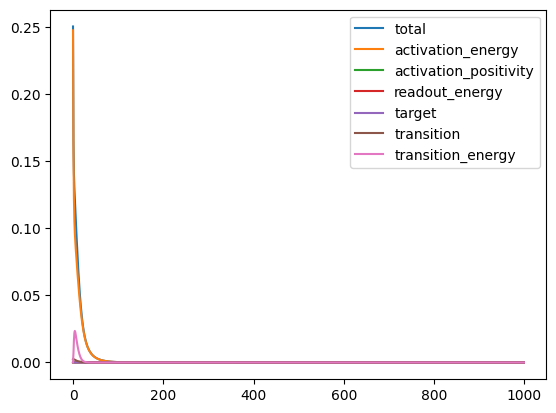

In [152]:
loss_sum = np.sum([v for v in loss.values()], axis=0)

plt.plot(loss_sum, label = 'total')

for k,v in loss.items():
    plt.plot(v, label = k)

plt.legend()

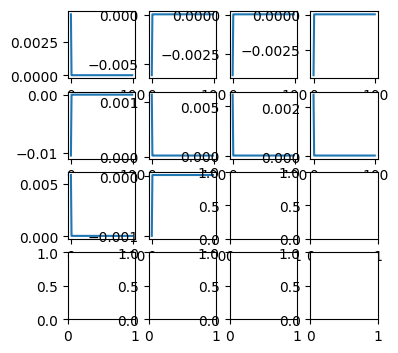

In [153]:
K=2
D=5
fig, axes = plt.subplots(int(np.ceil(np.sqrt(K*D))), int(np.ceil(np.sqrt(K*D))), figsize=(4, 4))

for i in range(K*D):
    ax = axes[i // int(np.ceil(np.sqrt(K*D))), i%int(np.ceil(np.sqrt(K*D)))]
    ax.plot(aux['x'][:,i])


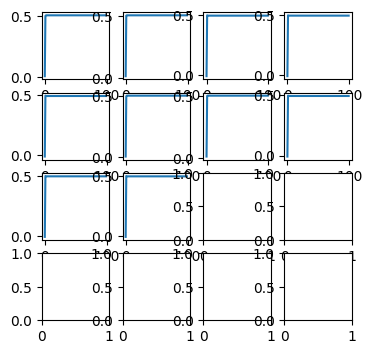

In [154]:
K=2
D=5
fig, axes = plt.subplots(int(np.ceil(np.sqrt(K*D))), int(np.ceil(np.sqrt(K*D))), figsize=(4, 4))

for i in range(K*D):
    ax = axes[i // int(np.ceil(np.sqrt(K*D))), i%int(np.ceil(np.sqrt(K*D)))]
    ax.plot(teacher_x['x'][:,i])


In [185]:
import model
import jax
import jax.numpy as jnp
key = jax.random.PRNGKey(52)
teacher = model.ModularTeacher([
        model.ShootingModel(K=1,
                      D=5,
                      T=100,
                      key=key,
                      non_linearity="tanh",
                      lambdas=model.SHOOTING_LAMBDAS,
                      sigma=1) for _ in range(2)
    ])

In [186]:
x0=jax.random.normal(key, (2, 5))
out=teacher.forward(x0)

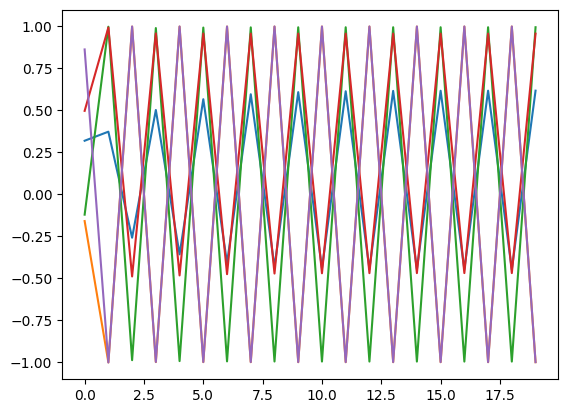

In [187]:
plt.plot(out[0][0][:20])

In [278]:
ps = glob.glob('../nonlinear_logs_oscillatory/*')
ps.sort()
p=ps[-1]
print(p)
aux=jl.load(os.path.join(p, 'final_teacher_aux.jl'))
loss=jl.load(os.path.join(p, 'loss_history.jl'))
student_aux = jl.load(os.path.join(p, 'final_student_aux.jl'))

../nonlinear_logs_oscillatory/2024-05-09_14-36-15


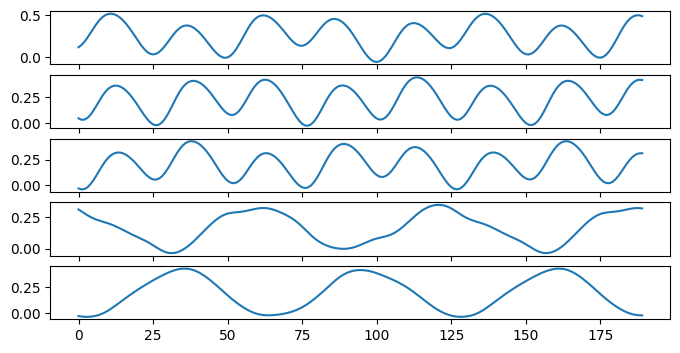

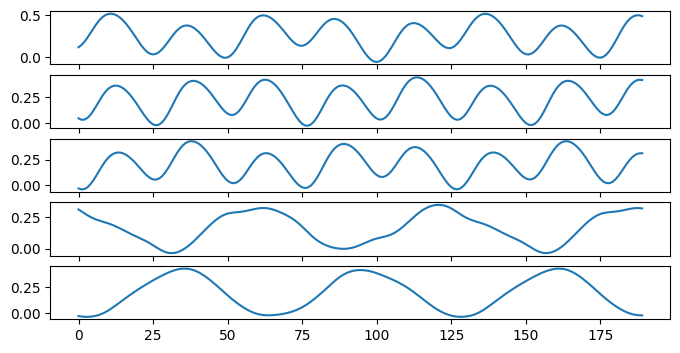

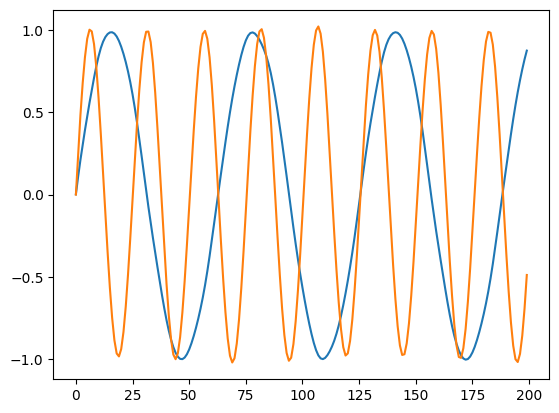

In [281]:
K=2
D=5

for i in range(K):
    fig, axes = plt.subplots(D,1, figsize=(8, 4))
    for j in range(D):
        axes[j].plot(student_aux['x'][10:,j])
fig = plt.figure()
for i in range(K):
    plt.plot(student_aux['y_pred'][:,i])

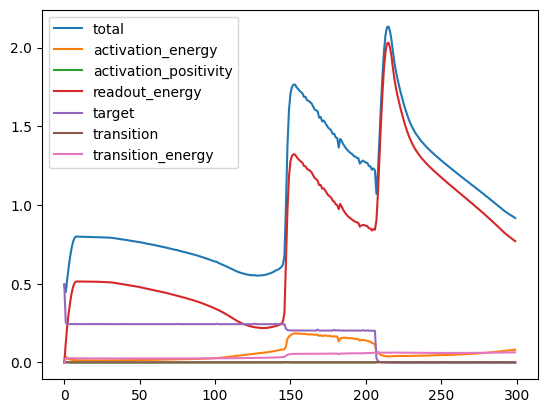

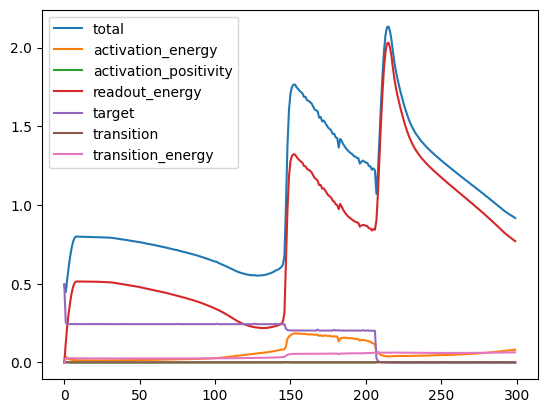

In [282]:
loss = jl.load(os.path.join(p, 'student_loss_history.jl'))
for m in range(K):
    fig = plt.figure()
    loss_sum = np.sum([v for v in loss.values()], axis=0)

    plt.plot(loss_sum, label = 'total')

    for k,v in loss.items():
        plt.plot(v, label = k)

    plt.legend()

In [232]:
key = jax.random.PRNGKey(13)
x0 = 0.001 * jax.random.normal(key, (5, ))

In [241]:
jnp.concat([teacher.modules[i].x0 for i in range(2)]).shape

(10,)

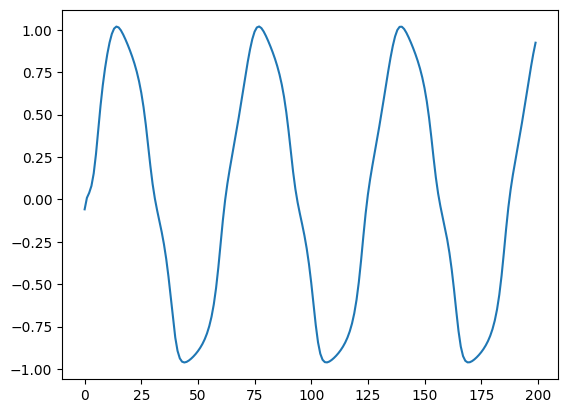

In [234]:
plt.plot(y)

In [235]:
print(y)

[[-0.05837343]
 [ 0.00929898]
 [ 0.03871321]
 [ 0.07975908]
 [ 0.15328127]
 [ 0.26702738]
 [ 0.4091647 ]
 [ 0.5509529 ]
 [ 0.6726172 ]
 [ 0.7731994 ]
 [ 0.85687363]
 [ 0.92492276]
 [ 0.97581345]
 [ 1.007342  ]
 [ 1.0191438 ]
 [ 1.0140514 ]
 [ 0.9969346 ]
 [ 0.9724266 ]
 [ 0.9436442 ]
 [ 0.91211647]
 [ 0.8781691 ]
 [ 0.841268  ]
 [ 0.80018294]
 [ 0.75298846]
 [ 0.69696254]
 [ 0.62853855]
 [ 0.54373294]
 [ 0.44001836]
 [ 0.32061833]
 [ 0.19846234]
 [ 0.09064497]
 [ 0.00457365]
 [-0.06500477]
 [-0.1276261 ]
 [-0.19171825]
 [-0.26413548]
 [-0.3507234 ]
 [-0.4555092 ]
 [-0.5771681 ]
 [-0.7039221 ]
 [-0.8147232 ]
 [-0.89284   ]
 [-0.93706876]
 [-0.95661205]
 [-0.9613122 ]
 [-0.95779115]
 [-0.9497065 ]
 [-0.9388462 ]
 [-0.92594653]
 [-0.911154  ]
 [-0.8942452 ]
 [-0.8747062 ]
 [-0.8517195 ]
 [-0.8240795 ]
 [-0.79003316]
 [-0.7470397 ]
 [-0.6914769 ]
 [-0.6184915 ]
 [-0.5227143 ]
 [-0.4015269 ]
 [-0.26186752]
 [-0.1232008 ]
 [-0.0039893 ]
 [ 0.09314924]
 [ 0.17595322]
 [ 0.2522588 ]
 [ 0.32710